In [38]:
import numpy as np

# A1a: Summation Unit
# This function calculates the weighted sum of inputs using the dot product of inputs and weights.
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# A1b: Activation Functions

# Step activation function: returns 1 if the weighted sum is >= 0, otherwise returns 0.
def step_activation(x):
    return 1 if x >= 0 else 0

# Bipolar step activation function: returns 1 if the weighted sum is >= 0, otherwise returns -1.
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

# Sigmoid activation function: returns a value between 0 and 1, using the sigmoid formula.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Tanh activation function: returns a value between -1 and 1, using the hyperbolic tangent formula.
def tanh_activation(x):
    return np.tanh(x)

# ReLU (Rectified Linear Unit) activation function: returns the input value if it's greater than 0, otherwise returns 0.
def relu(x):
    return max(0, x)

# Leaky ReLU activation function: returns the input if it's greater than 0, otherwise returns a small fraction (0.01 * x) of the input.
def leaky_relu(x):
    return x if x > 0 else 0.01 * x

# A1c: Error Comparator Unit
# This function calculates the difference (error) between the target output and the actual output.
def error_comparator(target, output):
    return target - output

# Example inputs and weights
inputs = [0.5, -0.2, 0.1]  # Input vector
weights = [0.4, 0.3, 0.9]  # Weight vector

# A1d: Calculate the weighted sum of inputs
weighted_sum = summation_unit(inputs, weights)
print(f"Weighted Sum: {weighted_sum}")

# A1e: Applying various activation functions to the weighted sum
print(f"Step Activation: {step_activation(weighted_sum)}")
print(f"Bipolar Step Activation: {bipolar_step_activation(weighted_sum)}")
print(f"Sigmoid Activation: {sigmoid(weighted_sum)}")
print(f"Tanh Activation: {tanh_activation(weighted_sum)}")
print(f"ReLU Activation: {relu(weighted_sum)}")
print(f"Leaky ReLU Activation: {leaky_relu(weighted_sum)}")

# A1f: Compare the actual output (from sigmoid) with the target using the error comparator
target = 1.0  # Desired target output
output = sigmoid(weighted_sum)  # Sigmoid activation output
error = error_comparator(target, output)
print(f"Error Comparator: {error}")


Weighted Sum: 0.23000000000000004
Step Activation: 1
Bipolar Step Activation: 1
Sigmoid Activation: 0.5572478545985556
Tanh Activation: 0.22602835227867096
ReLU Activation: 0.23000000000000004
Leaky ReLU Activation: 0.23000000000000004
Error Comparator: 0.44275214540144436


Number of epochs needed for convergence: 130


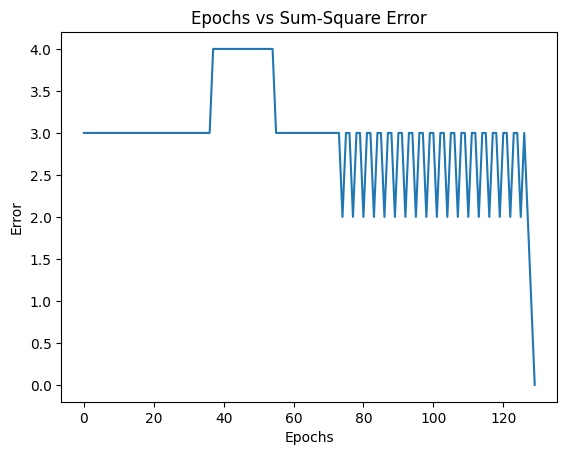

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# AND Gate dataset
# Inputs for an AND gate, where the output is 1 only if both inputs are 1.
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])  # Expected outputs for the AND gate

# Initial weights and learning rate
# weights = [bias, w1, w2], where bias is the weight for the bias term, and w1, w2 are the weights for the inputs.
weights = np.array([10, 0.2, -0.75])  # Random initial weights including bias
learning_rate = 0.05  # Small learning rate to control the weight update size

# Step activation function
# Returns 1 if the input is greater than or equal to 0, otherwise returns 0.
def step_activation(x):
    return 1 if x >= 0 else 0

# Perceptron Training
# Trains a single-layer perceptron on the given dataset using the specified learning rate and number of epochs.
def perceptron_train(inputs, targets, weights, learning_rate, epochs=1000, error_threshold=0.002):
    errors = []  # To store the total error for each epoch
    for epoch in range(epochs):
        total_error = 0  # Initialize total error for this epoch
        for i in range(len(inputs)):
            # Weighted sum of inputs (dot product between inputs and weights) + bias
            summation = np.dot(inputs[i], weights[1:]) + weights[0]  # W0 is the bias weight
            output = step_activation(summation)  # Apply step activation to get binary output (0 or 1)
            error = targets[i] - output  # Calculate the error (target - output)
            
            # Update the weights (w = w + learning_rate * error * input)
            weights[1:] += learning_rate * error * inputs[i]  # Update weights for inputs
            weights[0] += learning_rate * error  # Update bias weight
            
            # Accumulate the squared error for this epoch
            total_error += error ** 2
        
        errors.append(total_error)  # Record the total error for this epoch

        # Check if the total error is below the error threshold (for convergence)
        if total_error <= error_threshold:
            break  # Stop training if the perceptron has converged

    # Return the final weights, the list of errors, and the number of epochs used
    return weights, errors, epoch + 1

# Train the perceptron using the AND gate inputs and targets
final_weights, errors, epochs_used = perceptron_train(inputs, targets, weights, learning_rate)

# Print the number of epochs needed for convergence
print(f"Number of epochs needed for convergence: {epochs_used}")

# Plot the sum of squared errors for each epoch
plt.plot(errors)
plt.title('Epochs vs Sum-Square Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


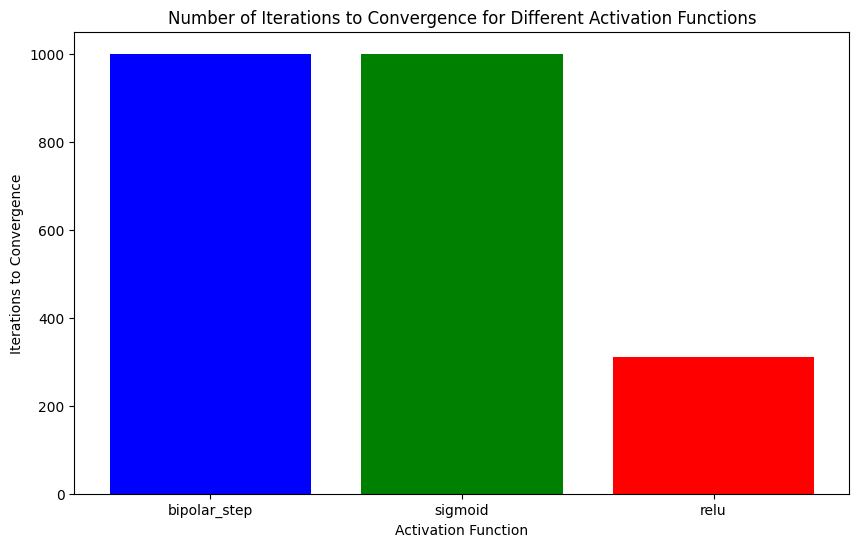

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset for an AND gate and the target outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input pairs
targets = np.array([0, 0, 0, 1])  # Expected outputs for the AND gate

# Define the activation functions
# Sigmoid activation function, produces an output between 0 and 1
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Bipolar step activation function, returns 1 if input >= 0, else -1
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

# ReLU (Rectified Linear Unit) activation function, returns 0 if input is negative
def relu_activation(x):
    return max(0, x)

# Error comparator function
# Calculates the error by subtracting the output from the target
def error_comparator(target, output):
    return target - output

# Perceptron training function
def perceptron_train(inputs, targets, weights, learning_rate, activation_function, epochs=1000, error_threshold=0.002):
    errors = []  # List to store errors for each epoch
    for epoch in range(epochs):  # Iterate over the number of epochs
        total_error = 0  # Initialize total error for this epoch
        for i in range(len(inputs)):  # For each input in the dataset
            # Calculate the weighted sum (inputs * weights) + bias
            summation = np.dot(inputs[i], weights[1:]) + weights[0]  # W0 is the bias term
            
            # Apply the selected activation function
            if activation_function == 'bipolar_step':
                output = bipolar_step_activation(summation)
            elif activation_function == 'sigmoid':
                output = sigmoid_activation(summation)
            elif activation_function == 'relu':
                output = relu_activation(summation)
            else:
                raise ValueError("Unknown activation function")
            
            # Compute the error (target - output)
            error = targets[i] - output
            
            # Update the weights based on the error
            weights[1:] += learning_rate * error * inputs[i]  # Update weights for inputs
            weights[0] += learning_rate * error  # Update bias weight
            
            # Accumulate the squared error for this epoch
            total_error += error ** 2
        
        errors.append(total_error)  # Store total error for this epoch
        
        # Check for convergence based on the error threshold
        if total_error <= error_threshold:
            break  # Stop training if the error is below the threshold
    
    # Return the final weights, list of errors, and the number of epochs used
    return weights, errors, epoch + 1

# Initialize weights with random values (including bias)
initial_weights = np.array([0.1, 0.2, -0.3])
learning_rate = 0.05  # Learning rate for weight updates

# List to store the activation functions to test
activation_functions = ['bipolar_step', 'sigmoid', 'relu']
iterations_to_convergence = []  # List to store the number of epochs to converge for each activation function

# Train the perceptron using each activation function and store the number of iterations to convergence
for func in activation_functions:
    weights = np.copy(initial_weights)  # Reset weights to initial values before each run
    _, _, iterations = perceptron_train(inputs, targets, weights, learning_rate, func)  # Train perceptron
    iterations_to_convergence.append(iterations)  # Store the number of epochs required to converge

# Plot the results
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.bar(activation_functions, iterations_to_convergence, color=['blue', 'green', 'red'])  # Create bar plot
plt.title('Number of Iterations to Convergence for Different Activation Functions')  # Set title of the plot
plt.xlabel('Activation Function')  # Set label for the x-axis
plt.ylabel('Iterations to Convergence')  # Set label for the y-axis
plt.show()  # Display the plot


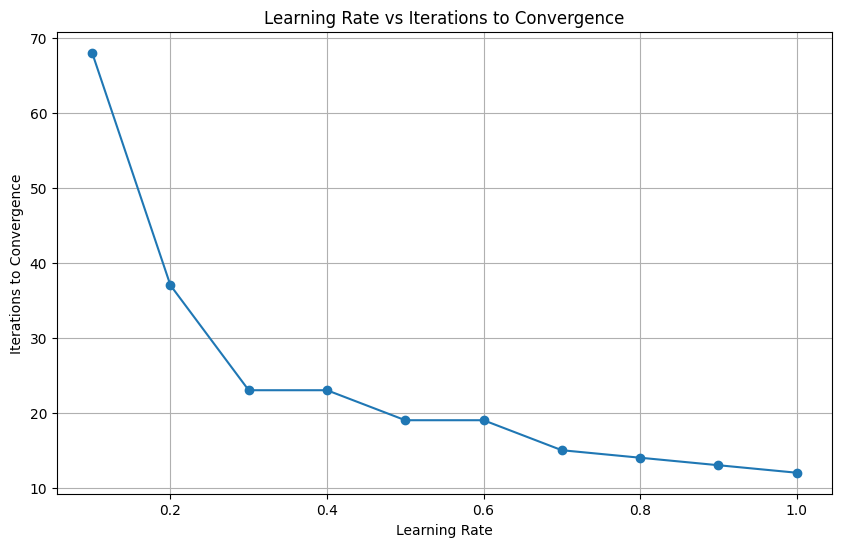

In [41]:
#A4
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset and initial weights
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Define the activation functions
def step_activation(x):
    return 1 if x >= 0 else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Error comparator unit
def error_comparator(target, output):
    return target - output

# Perceptron training function with a specific learning rate
def perceptron_train(inputs, targets, weights, learning_rate, activation_function, epochs=1000, error_threshold=0.002):
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            summation = np.dot(inputs[i], weights[1:]) + weights[0]  # W0 is bias
            
            # Apply the activation function
            if activation_function == 'step':
                output = step_activation(summation)
            elif activation_function == 'sigmoid':
                output = sigmoid(summation)
            else:
                raise ValueError("Unknown activation function")
            
            # Compute the error
            error = targets[i] - output
            
            # Update the weights
            weights[1:] += learning_rate * error * inputs[i]
            weights[0] += learning_rate * error  # Update bias
            
            total_error += error ** 2
        errors.append(total_error)
        # Check for convergence
        if total_error <= error_threshold:
            break
    return weights, errors, epoch + 1  # Return the number of epochs used

# Initialize weights and learning rates
initial_weights = np.array([10, 0.2, -0.75])
learning_rates = np.arange(0.1, 1.1, 0.1)
iterations_to_convergence = []

# Train the perceptron with each learning rate
for lr in learning_rates:
    weights = np.copy(initial_weights)
    _, _, iterations = perceptron_train(inputs, targets, weights, lr, 'step')  # Using step activation
    iterations_to_convergence.append(iterations)

# Plot learning rate vs iterations to convergence
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, iterations_to_convergence, marker='o')
plt.title('Learning Rate vs Iterations to Convergence')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Convergence')
plt.grid(True)
plt.show()


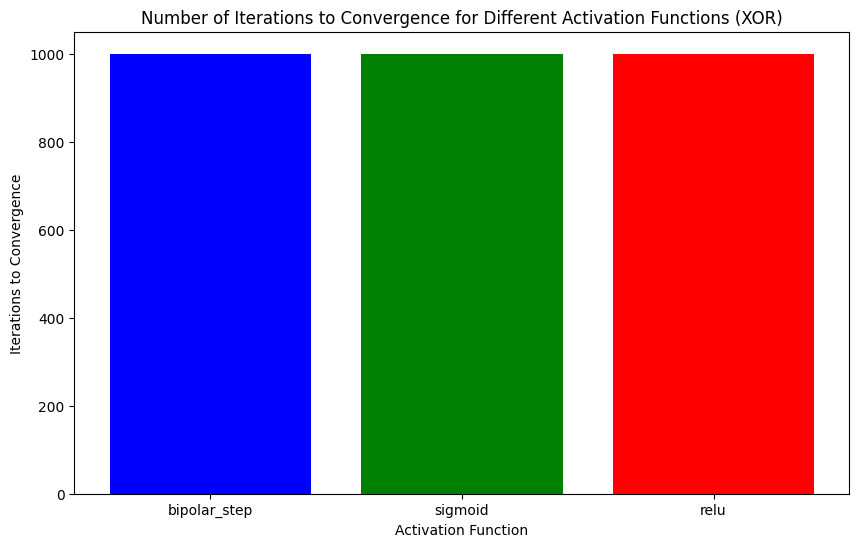

In [17]:

#A5
import numpy as np
import matplotlib.pyplot as plt

# XOR Gate dataset
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_targets = np.array([0, 1, 1, 0])

# Define the activation functions
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def relu_activation(x):
    return max(0, x)

# Error comparator function
def error_comparator(target, output):
    return target - output

# Perceptron training function with specified activation function
def perceptron_train(inputs, targets, weights, learning_rate, activation_function, epochs=1000, error_threshold=0.002):
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            summation = np.dot(inputs[i], weights[1:]) + weights[0]  # W0 is bias
            
            # Apply the activation function
            if activation_function == 'bipolar_step':
                output = bipolar_step_activation(summation)
            elif activation_function == 'sigmoid':
                output = sigmoid_activation(summation)
            elif activation_function == 'relu':
                output = relu_activation(summation)
            else:
                raise ValueError("Unknown activation function")
            
            # Compute the error
            error = targets[i] - output
            
            # Update the weights
            weights[1:] += learning_rate * error * inputs[i]
            weights[0] += learning_rate * error  # Update bias
            
            total_error += error ** 2
        errors.append(total_error)
        # Check for convergence
        if total_error <= error_threshold:
            break
    return weights, errors, epoch + 1  # Return the number of epochs used

# Initialize weights
initial_weights = np.array([0.1, 0.2, -0.3])
learning_rate = 0.05

# Initialize lists to store results
activation_functions = ['bipolar_step', 'sigmoid', 'relu']
iterations_to_convergence = []

# Train perceptron with each activation function for XOR
for func in activation_functions:
    weights = np.copy(initial_weights)
    _, _, iterations = perceptron_train(xor_inputs, xor_targets, weights, learning_rate, func)
    iterations_to_convergence.append(iterations)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(activation_functions, iterations_to_convergence, color=['blue', 'green', 'red'])
plt.title('Number of Iterations to Convergence for Different Activation Functions (XOR)')
plt.xlabel('Activation Function')
plt.ylabel('Iterations to Convergence')
plt.show()


In [18]:
#A6
import numpy as np

# Customer data
customer_data = np.array([
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]
])
features = customer_data[:, :-1]
payments = customer_data[:, -1]
high_value = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Perceptron training with sigmoid activation
def perceptron_train(inputs, targets, weights, learning_rate, epochs=1000, error_threshold=0.002):
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            summation = np.dot(inputs[i], weights[1:]) + weights[0]  # W0 is bias
            output = sigmoid(summation)
            output = 1 if output >= 0.5 else 0  # Convert sigmoid output to binary
            
            # Compute the error
            error = targets[i] - output
            
            # Update the weights
            weights[1:] += learning_rate * error * inputs[i]
            weights[0] += learning_rate * error  # Update bias
            
            total_error += error ** 2
        errors.append(total_error)
        if total_error <= error_threshold:
            break
    return weights, errors

# Initialize weights
initial_weights = np.zeros(features.shape[1] + 1)  # +1 for bias
learning_rate = 0.05

# Train perceptron
final_weights, errors = perceptron_train(features, high_value, initial_weights, learning_rate)

# Print final weights
print(f"Final Weights: {final_weights}")


Final Weights: [ 0.   -0.3   2.5  -0.25]


In [19]:
#A7
from numpy.linalg import pinv

# Calculate weights using pseudo-inverse
X_with_bias = np.hstack((np.ones((features.shape[0], 1)), features))  # Add bias term
pseudo_inverse_weights = pinv(X_with_bias) @ high_value

print(f"Pseudo-Inverse Weights: {pseudo_inverse_weights}")


Pseudo-Inverse Weights: [ 0.1139903  -0.02342675  0.2607237   0.03727212]


In [20]:
#A8
import numpy as np

# Define XOR Gate dataset (AND Gate for A8)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Define sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and learning rate
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1
learning_rate = 0.05
epochs = 1000

# Initialize weights
np.random.seed(1)
weights_input_hidden = np.random.rand(input_layer_size, hidden_layer_size)
weights_hidden_output = np.random.rand(hidden_layer_size, output_layer_size)
bias_hidden = np.random.rand(1, hidden_layer_size)
bias_output = np.random.rand(1, output_layer_size)

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Error calculation
    error = y - predicted_output
    if np.all(np.abs(error) <= 0.002):
        break

    # Backward pass
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

print("Training complete. Final predicted output:")
print(predicted_output)


Training complete. Final predicted output:
[[0.25387653]
 [0.26213309]
 [0.25491349]
 [0.26301298]]


In [33]:
#A9
import numpy as np

# Define XOR gate data
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_targets = np.array([0, 1, 1, 0])  # XOR target outputs

# Summation Unit
def summation_unit(inputs, weights):
    return np.dot(inputs, weights[1:]) + weights[0]  # Adding bias term

# Activation Functions
def step_activation(x):
    return 1 if x >= 0 else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# Error Comparator
def error_comparator(target, output):
    return target - output

# Perceptron Training Function
def perceptron_train(inputs, targets, weights, learning_rate, activation_function, epochs=1000, error_threshold=0.002):
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            # Compute the weighted sum
            summation = summation_unit(inputs[i], weights)
            
            # Apply the activation function
            if activation_function == 'step':
                output = step_activation(summation)
            elif activation_function == 'sigmoid':
                output = sigmoid(summation)
            elif activation_function == 'relu':
                output = relu(summation)
            else:
                raise ValueError("Unknown activation function")
            
            # Compute the error
            error = error_comparator(targets[i], output)
            total_error += np.sum(error ** 2)
            
            # Update the weights
            weights[1:] += learning_rate * error * inputs[i]
            weights[0] += learning_rate * error  # Update bias term
        
        errors.append(total_error)
        if total_error <= error_threshold:
            break
    return weights, errors, epoch + 1  # Return the number of epochs used

# Initialize weights and learning rate
initial_weights = np.array([0.1, 0.2, -0.3])  # Including bias term
learning_rate = 0.1  # Example learning rate

# Train perceptron for XOR gate logic
weights, errors, iterations = perceptron_train(xor_inputs, xor_targets, initial_weights, learning_rate, 'sigmoid')

# Display results
print(f"Trained weights: {weights}")
print(f"Number of iterations to converge: {iterations}")


Trained weights: [ 0.05128176 -0.10256353 -0.05128176]
Number of iterations to converge: 1000


In [37]:
#A10
import numpy as np

# Define AND gate data with two output nodes
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_targets = np.array([[1, 0], [0, 1], [0, 1], [0, 1]])  # [O1, O2] = [1, 0] for 0 and [0, 1] for 1

# Define XOR gate data with two output nodes
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_targets = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # [O1, O2] = [1, 0] for 0 and [0, 1] for 1

# Summation Unit
def summation_unit(inputs, weights):
    return np.dot(inputs, weights[1:]) + weights[0]  # Adding bias term

# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Error Comparator
def error_comparator(target, output):
    return target - output

# Perceptron Training Function for Multi-Class
def perceptron_train_multi_class(inputs, targets, weights, learning_rate, activation_function, epochs=1000, error_threshold=0.002):
    num_outputs = targets.shape[1]
    num_features = inputs.shape[1]
    weights = np.random.rand(num_features + 1, num_outputs) * 0.01  # Initialize weights for multi-class
    
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            # Compute the weighted sum
            summation = summation_unit(inputs[i], weights[:, 0])  # Single output for each node
            
            # Apply the activation function
            if activation_function == 'sigmoid':
                output = sigmoid(summation)
            else:
                raise ValueError("Unknown activation function")
            
            # Compute the error
            error = error_comparator(targets[i], output)
            total_error += np.sum(error ** 2)
            
            # Update the weights
            weights[1:] += learning_rate * np.outer(inputs[i], error)
            weights[0] += learning_rate * error  # Update bias term
        
        errors.append(total_error)
        if total_error <= error_threshold:
            break
    return weights, errors, epoch + 1  # Return the number of epochs used

# Initialize weights for AND and XOR gates
learning_rate = 0.1  # Example learning rate

# Train perceptron for AND gate logic
weights, errors, iterations = perceptron_train_multi_class(and_inputs, and_targets, None, learning_rate, 'sigmoid')
print(f"AND gate - Trained weights: {weights}")
print(f"AND gate - Number of iterations to converge: {iterations}")

# Train perceptron for XOR gate logic
weights, errors, iterations = perceptron_train_multi_class(xor_inputs, xor_targets, None, learning_rate, 'sigmoid')
print(f"XOR gate - Trained weights: {weights}")
print(f"XOR gate - Number of iterations to converge: {iterations}")


AND gate - Trained weights: [[  2.91396635 202.90853062]
 [ -6.78353411 193.21794563]
 [ -6.78724306 193.21234602]]
AND gate - Number of iterations to converge: 1000
XOR gate - Trained weights: [[-0.05128176 -0.04692051]
 [ 0.10256352  0.09736605]
 [ 0.05128176  0.04402135]]
XOR gate - Number of iterations to converge: 1000


In [27]:
#A11
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define MLPClassifier for AND gate
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', learning_rate_init=0.05, max_iter=1000)
mlp_and.fit(and_inputs, np.argmax(and_targets, axis=1))
and_predictions = mlp_and.predict(and_inputs)
print(f"AND gate accuracy: {accuracy_score(np.argmax(and_targets, axis=1), and_predictions)}")

# Define MLPClassifier for XOR gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', learning_rate_init=0.05, max_iter=1000)
mlp_xor.fit(xor_inputs, np.argmax(xor_targets, axis=1))
xor_predictions = mlp_xor.predict(xor_inputs)
print(f"XOR gate accuracy: {accuracy_score(np.argmax(xor_targets, axis=1), xor_predictions)}")


AND gate accuracy: 1.0
XOR gate accuracy: 1.0


In [30]:
#A12
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('Optimized_Predicting_Child_Birth_Weight.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Preprocess the data
# Assume 'LNH' is the target variable, and the rest are features
features = data.drop(columns=['LNH'])
target = data['LNH']

# Handle missing values if any
features.fillna(features.mean(), inplace=True)  # Simple imputation for missing values

# Encode categorical variables if necessary (example: using one-hot encoding)
# features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


   SEC  Age(years)  Height(cm)  Bgroup  Parity  ANC  Iwt(kg)  FWt(kg)  \
0    1        23.0       146.0       0     1.0  4.0     34.0     42.0   
1    1        25.0       145.0       4     1.0  3.0     45.0     51.0   
2    1        24.0       155.0       4     1.0  3.0     49.0     55.0   
3    1        19.0       154.0       4     1.0  2.0     49.0     50.0   
4    1        21.0       150.0       4     1.0  4.0     41.0     48.0   

   IBP_sys  IBP_dias  FBP_sys  FBP_dias   IHb(gm%)   FHb(gm%)     BS(RBS)  \
0    116.0      78.0    120.0      70.0  10.000000  10.401651  100.898026   
1     96.0      70.0    110.0      72.0  10.400000  11.000000  100.898026   
2     91.0      52.0    110.0      70.0   9.919398  11.600000  100.898026   
3     90.0      52.0    100.0      60.0  10.000000  10.600000  100.898026   
4    100.0      60.0    110.0      70.0   9.000000  10.200000  100.898026   

   Term/Preterm  Sex  BWt(kg)  LNH  
0             1    0  2.70000    1  
1             1    1  2.

C:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
